<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
y = df["Churn"]
enc = LabelEncoder()
y = enc.fit_transform(y)

data = df.iloc[:, 1:-1]


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='gender', ylabel='count'>

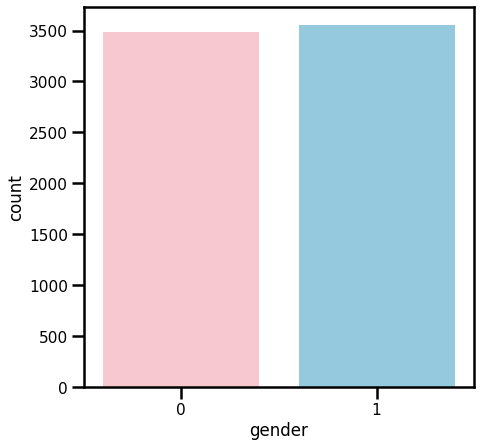

In [ ]:
plt.figure(figsize=(7,7))
sns.set_context("poster", font_scale=0.7)
sns.set_palette(['pink', 'skyblue'])
sns.countplot(data['gender'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


([<matplotlib.axis.XTick at 0x7f1239f0a4f0>,
 [Text(0, 0, 'Not a SeniorCitizen'), Text(1, 0, 'SeniorCitizen')])

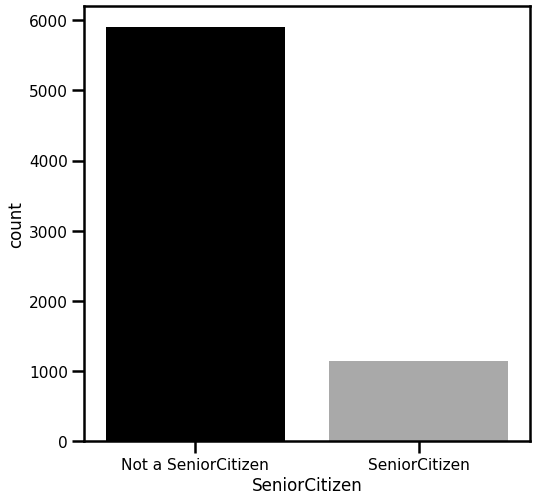

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("poster", font_scale=0.7)
sns.set_palette(['k', 'darkgrey'])
sns.countplot(data['SeniorCitizen'])
plt.xticks([0,1], ['Not a SeniorCitizen', 'SeniorCitizen'])

In [ ]:
c = (data.dtypes == "object")
catcol = list(c[c].index)
c

gender               True
SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges         True
dtype: bool

In [ ]:
for col in catcol:
  data[col] = enc.fit_transform(data[col])


In [ ]:
data.cov()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,0.250013,-0.000345,-0.000452,0.002409,0.062705,-0.000959,-0.003196,-0.000319,-0.006456,-0.005306,0.000242,-0.002940,-0.002842,-0.003869,0.000052,-0.002888,0.009267,-0.219201,-4.996891e+00
SeniorCitizen,-0.000345,0.135875,0.003036,-0.035662,0.149978,0.000935,0.051113,-0.008787,-0.040640,-0.004423,-0.006941,-0.048039,0.010040,0.015421,-0.043811,0.028356,-0.015178,2.442062,2.621359e+01
Partner,-0.000452,0.003036,0.249748,0.103635,4.660232,0.002617,0.067508,0.000329,0.064812,0.067356,0.073144,0.054566,0.060743,0.057313,0.122836,-0.003654,-0.082628,1.456344,5.622428e+01
Dependents,0.002409,-0.035662,0.103635,0.209865,1.796915,-0.000239,-0.010859,0.015071,0.059939,0.036698,0.032466,0.052700,0.019008,0.008645,0.092886,-0.025076,-0.019715,-1.569926,-8.281965e+00
tenure,0.062705,0.149978,4.660232,1.796915,603.168108,0.061364,7.991268,-0.550103,6.873037,8.016982,8.019992,6.833197,6.289581,6.453092,13.752216,0.074260,-9.717310,183.196987,7.353140e+03
PhoneService,-0.000959,0.000935,0.002617,-0.000239,0.061364,0.087469,-0.005762,0.084540,-0.003865,0.006275,0.000970,-0.004881,0.014488,0.011484,0.000554,0.002399,-0.001322,2.201644,4.647168e+01
MultipleLines,-0.003196,0.051113,0.067508,-0.010859,7.991268,-0.005762,0.899755,-0.076434,0.005824,0.097954,0.102096,0.009370,0.146957,0.151924,0.087661,0.076987,-0.179119,12.375142,2.059451e+02
InternetService,-0.000319,-0.008787,0.000329,0.015071,-0.550103,0.084540,-0.076434,0.544343,-0.018027,0.023467,0.029179,-0.016557,0.070138,0.064224,0.061342,-0.050265,0.067882,-7.176482,-7.765014e+01
OnlineSecurity,-0.006456,-0.040640,0.064812,0.059939,6.873037,-0.003865,0.005824,-0.018027,0.739338,0.140104,0.133154,0.211150,0.033992,0.042583,0.268419,-0.066616,-0.088834,-1.393980,6.878749e+01
OnlineBackup,-0.005306,-0.004423,0.067356,0.036698,8.016982,0.006275,0.097954,0.023467,0.140104,0.774686,0.145417,0.148437,0.114650,0.106510,0.206194,-0.005784,-0.117370,3.172196,1.508688e+02


In [ ]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756


<AxesSubplot:>

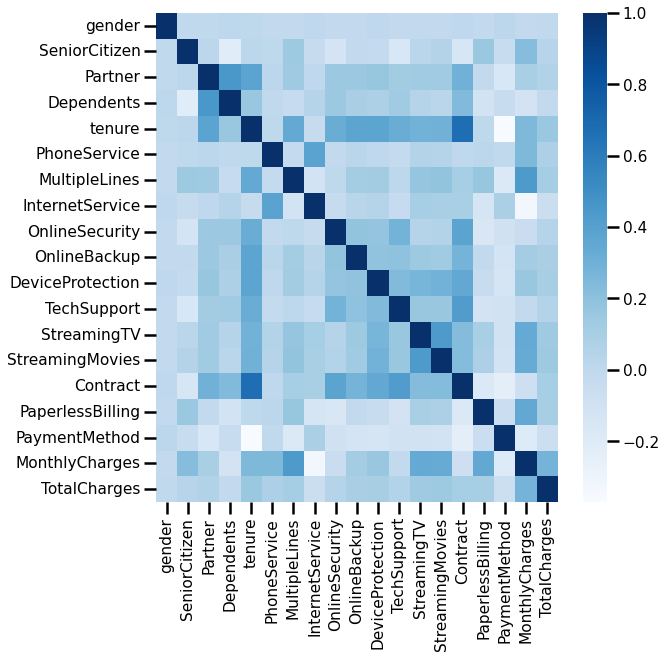

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), cmap='Blues')


In [ ]:
!pip uninstall -y pandas-profiling

Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Successfully uninstalled pandas-profiling-3.2.0


In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 5.0 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport
ProfileReport(df)


<ipython-input-6-bed390a979dc>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_Churn_yes=df[df['Churn']=='Yes'].copy()
df_Churn_no=df[df['Churn']=='No'].copy()

df_Churn_yes['TotalCharges']=pd.to_numeric(df_Churn_yes['TotalCharges'],errors='coerce')
df_Churn_no['TotalCharges']=pd.to_numeric(df_Churn_no['TotalCharges'],errors='coerce')

# convert TotalCharges
# use mean of TotalCharges to fill nan

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

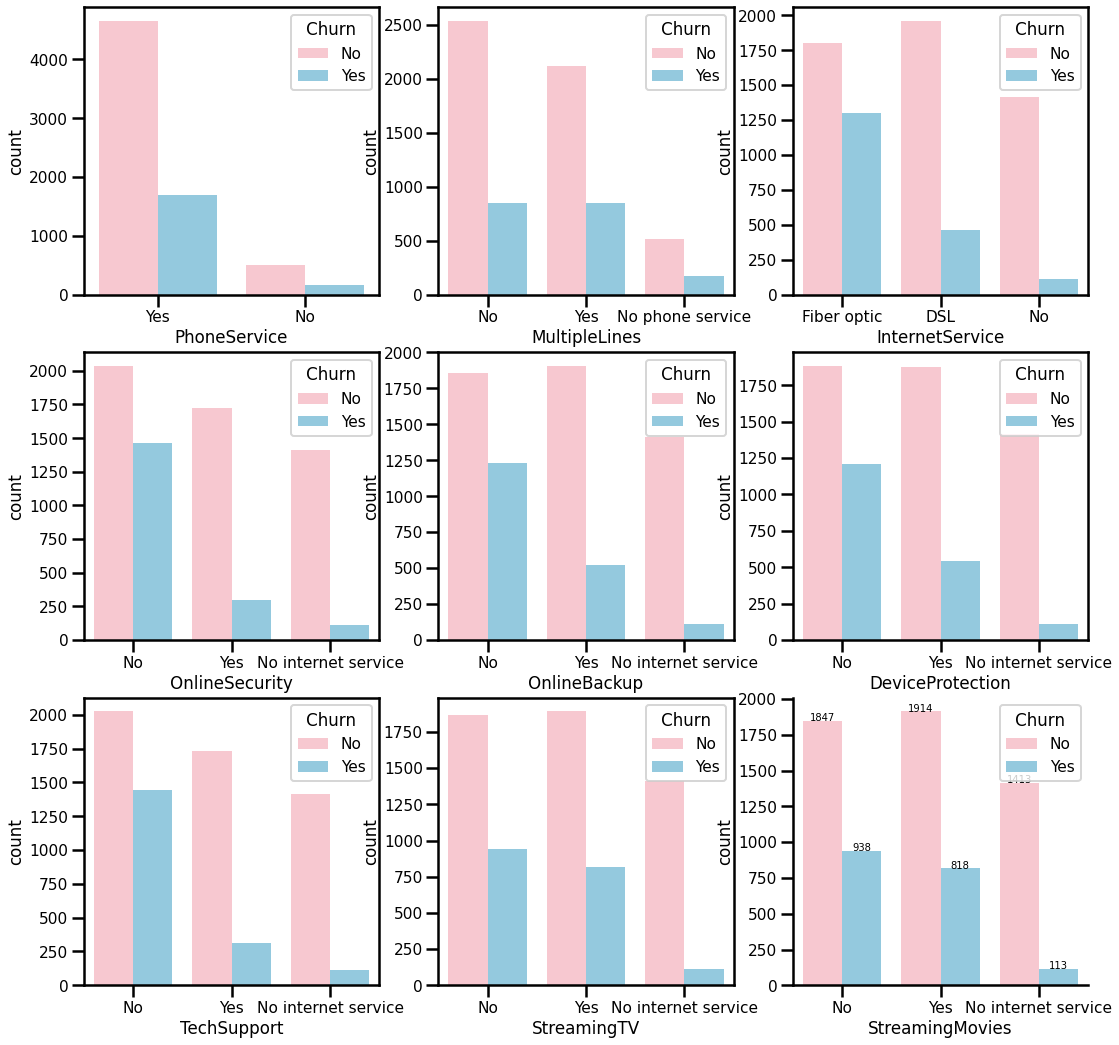

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (18,18))

for i in range(9):
    ax=axes[int(i/3),i%3]
    ser =services[i]
    sns.countplot(x=ser,hue='Churn',data=df,ax=ax,order=df[ser].value_counts().index)
    #present values in each bar
for i in ax.patches:
        ax.text(i.get_x()+i.get_width()/2,i.get_height()*1,i.get_height(),color='k',
            ha='center',c='k',fontsize=10)
    #plt.legend(loc='best')
    # remember reduce non-data ink
for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

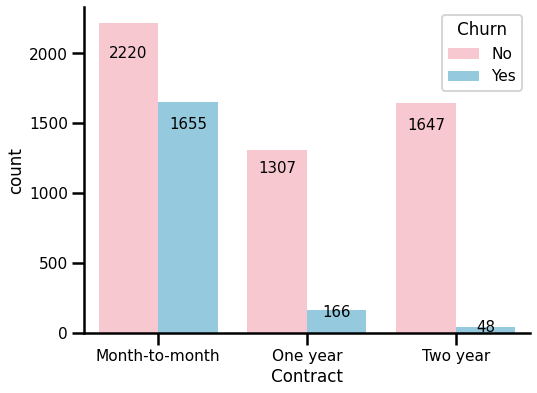

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Contract',hue='Churn',data=df,ax=ax)

#present values in each bar
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()*0.90,i.get_height(),color='k',
           ha='center',va='center',c='k',fontsize=15)

# remember reduce non-data ink
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Text(0.5, 1.0, 'The histogram of Total Charges categorized by Churn')

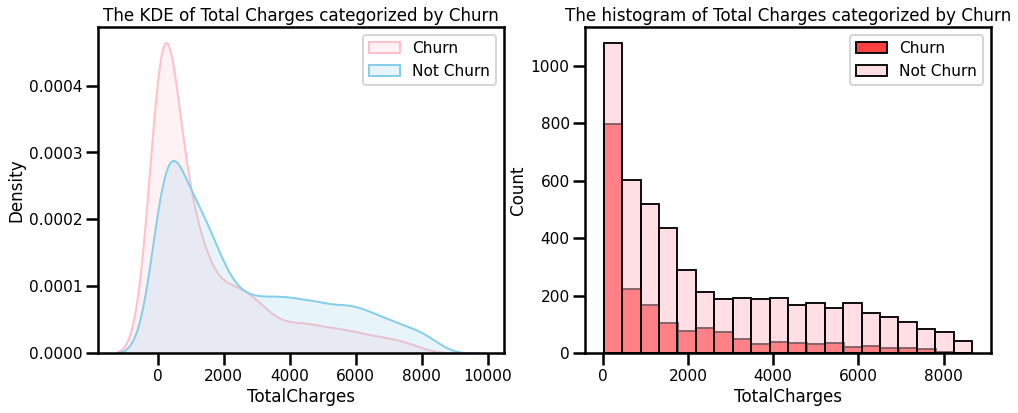

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
plt.sca(axes[0])
sns.kdeplot(df_Churn_yes['TotalCharges'],shade=True,alpha=0.2,legend=True,label='Churn')
sns.kdeplot(df_Churn_no['TotalCharges'],shade=True,alpha=0.2,legend=True,label='Not Churn')
plt.legend()
plt.title('The KDE of Total Charges categorized by Churn')


plt.sca(axes[1])
sns.histplot(df_Churn_yes['TotalCharges'],bins=20,color='red',legend=True,label='Churn')
sns.histplot(df_Churn_no['TotalCharges'],bins=20,alpha=0.5,legend=True,label='Not Churn')
plt.legend()
plt.title('The histogram of Total Charges categorized by Churn')


Text(0.5, 1.0, 'The histogram of Monthly Chanrges categorized by Churn')

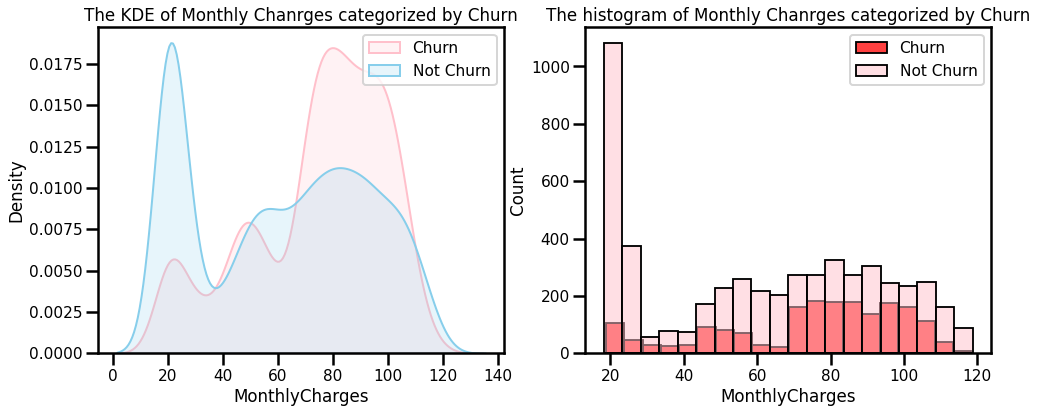

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
plt.sca(axes[0])
sns.kdeplot(df_Churn_yes['MonthlyCharges'],shade=True,alpha=0.2,legend=True,label='Churn')
sns.kdeplot(df_Churn_no['MonthlyCharges'],shade=True,alpha=0.2,legend=True,label='Not Churn')
plt.legend()
plt.title('The KDE of Monthly Chanrges categorized by Churn')


plt.sca(axes[1])
sns.histplot(df_Churn_yes['MonthlyCharges'],bins=20,color='red',legend=True,label='Churn')
sns.histplot(df_Churn_no['MonthlyCharges'],bins=20,alpha=0.5,legend=True,label='Not Churn')
plt.legend()
plt.title('The histogram of Monthly Chanrges categorized by Churn')
